In [4]:
import pandas as pd
from mplsoccer.pitch import Pitch

In [5]:
df = pd.read_csv('football_data.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
df = df[df['teamId']=='Barcelona']

In [7]:
#now we want to find our passes and recipients and then filter for only passes
df['passer'] = df['playerId']
df['recipient'] = df['playerId'].shift(-1)

#find passes and then only look for the successful passes
passes = df[df['type']=='Pass']
successful = passes[passes['outcome']=='Successful']
successful2 = passes[passes['outcome']=='Successful']



In [8]:
successful2

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9.0,8.0
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8.0,21.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21.0,15.0
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15.0,1.0
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [9]:
#find the first subsititution and filter the successful dataframe to be less than that minute
subs = df[df['type']=='SubstitutionOff']
subs = subs['minute']
firstSub = subs.min()
firstsub_str=str(firstSub)+'th'
print('First sub was at',firstsub_str, 'minutes')

successful = successful[successful['minute'] < firstSub]
successful2 = successful2[successful2['minute'] > firstSub]


First sub was at 70th minutes


In [12]:
successful2

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
1285,2248253369,805,72,22.0,Barcelona,66.7,28.8,2,Pass,Successful,10.0,65.8,45.5,10.0,16.0
1290,2248253385,808,72,29.0,Barcelona,67.4,56.1,2,Pass,Successful,16.0,87.3,74.1,16.0,351252.0
1291,2248253387,809,72,30.0,Barcelona,87.2,74.1,2,Pass,Successful,351252.0,93.8,62.0,351252.0,10.0
1305,2248253475,812,73,11.0,Barcelona,13.4,48.2,2,Pass,Successful,1.0,27.6,8.6,1.0,8.0
1306,2248253479,813,73,14.0,Barcelona,27.6,8.6,2,Pass,Successful,8.0,41.9,39.7,8.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8.0,10.0
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10.0,14.0
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14.0,44721.0
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721.0,2.0


In [13]:
#this makes it so our passer and recipients are float values
pas = pd.to_numeric(successful['passer'],downcast='integer')
pas2 = pd.to_numeric(successful2['passer'],downcast='integer')

rec = pd.to_numeric(successful['recipient'],downcast='integer')
rec2 = pd.to_numeric(successful2['recipient'],downcast='integer')

successful['passer'] = pas
successful2['passer'] = pas2

successful['recipient'] = rec
successful2['recipient'] = rec2


C:\Users\admin\AppData\Local\Temp/ipykernel_15252/751922583.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful2['passer'] = pas2
C:\Users\admin\AppData\Local\Temp/ipykernel_15252/751922583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successful2['recipient'] = rec2


In [15]:
#now we need to find the average locations and counts of the passes
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations2 = successful2.groupby('passer').agg({'x':['mean'],'y':['mean','count']})

average_locations.columns = ['x','y','count']
average_locations2.columns = ['x2','y2','count2']


In [17]:
average_locations2

,x2,y2,count2
passer,,,
1,7.744444,44.544444,9
2,50.700000,13.820000,5
8,41.029167,51.925000,24
9,93.200000,79.600000,1
10,59.873333,57.246667,15
14,59.244444,63.655556,9
15,33.137500,74.012500,16
16,54.600000,51.733333,3
28,33.371429,23.057143,7


In [18]:
successful2

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipient
1285,2248253369,805,72,22.0,Barcelona,66.7,28.8,2,Pass,Successful,10.0,65.8,45.5,10,16
1290,2248253385,808,72,29.0,Barcelona,67.4,56.1,2,Pass,Successful,16.0,87.3,74.1,16,351252
1291,2248253387,809,72,30.0,Barcelona,87.2,74.1,2,Pass,Successful,351252.0,93.8,62.0,351252,10
1305,2248253475,812,73,11.0,Barcelona,13.4,48.2,2,Pass,Successful,1.0,27.6,8.6,1,8
1306,2248253479,813,73,14.0,Barcelona,27.6,8.6,2,Pass,Successful,8.0,41.9,39.7,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,2248256867,1018,93,14.0,Barcelona,76.7,31.8,2,Pass,Successful,8.0,76.7,43.0,8,10
1652,2248256869,1019,93,17.0,Barcelona,79.6,24.2,2,Pass,Successful,10.0,77.1,53.6,10,14
1653,2248256983,1020,93,18.0,Barcelona,77.1,56.4,2,Pass,Successful,14.0,69.0,56.9,14,44721
1654,2248256989,1021,93,20.0,Barcelona,68.3,55.2,2,Pass,Successful,44721.0,87.0,17.3,44721,2


In [19]:
#now we need to find the number of passes between each player
pass_between = successful.groupby(['passer','recipient']).id.count().reset_index()
pass_between2 = successful2.groupby(['passer','recipient']).id.count().reset_index()

pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)
pass_between2.rename({'id':'pass_count'},axis='columns',inplace=True)


#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between2 = pass_between2.merge(average_locations2, left_on='passer',right_index=True)

pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])
pass_between2 = pass_between2.merge(average_locations2, left_on='recipient',right_index=True,suffixes=['', '_end2'])


In [20]:
pass_between2

,passer,recipient,pass_count,x2,y2,count2,x2_end2,y2_end2,count2_end2
0,1,8,1,7.744444,44.544444,9,41.029167,51.925000,24
5,2,8,1,50.700000,13.820000,5,41.029167,51.925000,24
17,10,8,2,59.873333,57.246667,15,41.029167,51.925000,24
22,14,8,2,59.244444,63.655556,9,41.029167,51.925000,24
27,15,8,1,33.137500,74.012500,16,41.029167,51.925000,24
37,28,8,3,33.371429,23.057143,7,41.029167,51.925000,24
41,44721,8,8,38.500000,52.978261,23,41.029167,51.925000,24
51,89931,8,1,28.028571,45.800000,7,41.029167,51.925000,24
54,351252,8,2,61.200000,88.981818,11,41.029167,51.925000,24
1,1,15,2,7.744444,44.544444,9,33.137500,74.012500,16


In [21]:
#set minimum threshold of combinations.. I like 5 for high passing teams. 2 or 3 for low passing.
pass_between = pass_between[pass_between['pass_count']>5]
pass_between2 = pass_between2[pass_between2['pass_count']>1]


In [22]:

pass_between2


,passer,recipient,pass_count,x2,y2,count2,x2_end2,y2_end2,count2_end2
17,10,8,2,59.873333,57.246667,15,41.029167,51.925000,24
22,14,8,2,59.244444,63.655556,9,41.029167,51.925000,24
37,28,8,3,33.371429,23.057143,7,41.029167,51.925000,24
41,44721,8,8,38.500000,52.978261,23,41.029167,51.925000,24
54,351252,8,2,61.200000,88.981818,11,41.029167,51.925000,24
1,1,15,2,7.744444,44.544444,9,33.137500,74.012500,16
11,8,15,4,41.029167,51.925000,24,33.137500,74.012500,16
45,44721,15,2,38.500000,52.978261,23,33.137500,74.012500,16
56,351252,15,5,61.200000,88.981818,11,33.137500,74.012500,16
19,10,16,2,59.873333,57.246667,15,54.600000,51.733333,3


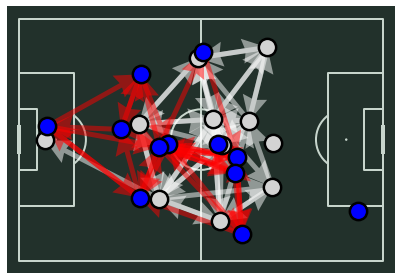

In [24]:
#plot the pitch

pitch = pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 5, headwidth = 5, color = 'w', ax = ax, zorder = 1, alpha = .5)
arrows2 = pitch.arrows(1.2*pass_between2.x2,.8*pass_between2.y2,1.2*pass_between2.x2_end2,.8*pass_between2.y2_end2,
                     width = 5, headwidth = 5, color = 'r', ax = ax, zorder = 1, alpha = .5)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 300, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)
nodes2 = pitch.scatter(1.2*average_locations2.x2,.8*average_locations2.y2,
                     s = 300, color = '#0000FF', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder = 1, ax=ax)

In [3]:
!cd

c:\Users\admin\Desktop\studymaterial\data_science
